#### **Importing all required libraries**

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

#### **Reading of Dataset**

In [2]:
dataframe = pd.read_csv("/content/Income.csv")
dataframe.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


#### **KMeans Clustering without any Preprocessing of Dataset**

Text(0, 0.5, 'Income($)')

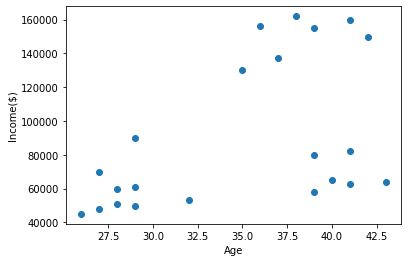

In [3]:
plt.scatter(dataframe['Age'],dataframe['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [9]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(dataframe[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [10]:
dataframe['cluster'] = y_predicted

In [11]:
dataframe.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [12]:
kmeans.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

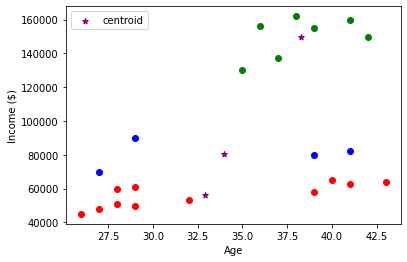

In [13]:
df1 = dataframe[dataframe['cluster'] == 0]
df2 = dataframe[dataframe['cluster'] == 1]
df3 = dataframe[dataframe['cluster'] == 2]


plt.scatter(df1['Age'],df1['Income($)'], color = 'red')
plt.scatter(df2['Age'],df2['Income($)'], color = 'green')
plt.scatter(df3['Age'],df3['Income($)'], color = 'blue')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#### **Clustering using MinMaxScaler Preprocessing**

In [15]:
scaler = MinMaxScaler()

dataframe['Income($)'] = scaler.fit_transform(dataframe[['Income($)']])
dataframe['Age'] = scaler.fit_transform(dataframe[['Age']])

In [16]:
dataframe.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


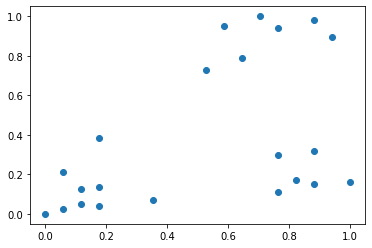

In [17]:
plt.scatter(dataframe['Age'],dataframe['Income($)'])

In [20]:
kmeans_scaler = KMeans(n_clusters=3)
y_predicted_scaler = kmeans_scaler.fit_predict(dataframe[['Age', 'Income($)']])
y_predicted_scaler

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [21]:
dataframe['cluster_scaler'] = y_predicted_scaler

In [22]:
dataframe.head()

,Name,Age,Income($),cluster,cluster_scaler
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


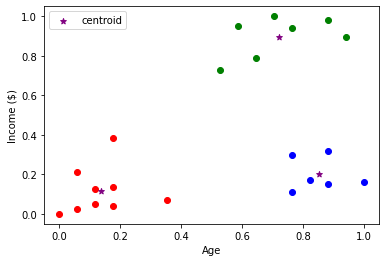

In [23]:
df_1 = dataframe[dataframe['cluster_scaler'] == 0]
df_2 = dataframe[dataframe['cluster_scaler'] == 1]
df_3 = dataframe[dataframe['cluster_scaler'] == 2]


plt.scatter(df_1['Age'],df_1['Income($)'], color = 'red')
plt.scatter(df_2['Age'],df_2['Income($)'], color = 'green')
plt.scatter(df_3['Age'],df_3['Income($)'], color = 'blue')

plt.scatter(kmeans_scaler.cluster_centers_[:,0],kmeans_scaler.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#### **Elbow Method**

In [48]:
sum_square_error = []
k_range = range(2,11)
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(dataframe[['Age','Income($)']])
  sum_square_error.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Plot')

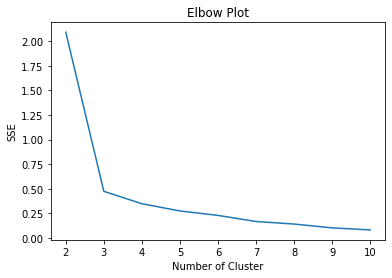

In [49]:
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.plot(k_range,sum_square_error)
plt.title('Elbow Plot')

#### **Result Analysis**

At k = 3, there is an Elbow in the above plot and this is the way to get the number of optimal clusters in KMeans Clustering Algorithm. 

### **Silhouette Clustering**


*   It is simply the method of interpretation and validation of consistency within the clusters.
*   Measure of how similar an object is to its own cluster compared to neighouring clusters.
*   Range lies from [-1,1].
*   High value of Silhouette score indicates that an object is well matched to
its own cluster and poorly matched with the neighouring cluster which is the good thing for our model.

In [50]:
new_dataframe = dataframe[['Age','Income($)']]

In [51]:
new_dataframe.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [53]:
from sklearn.metrics import silhouette_score
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit_predict(new_dataframe)
  print("Number of clusters:",k,"Silhouette score:", silhouette_score(new_dataframe, km.labels_))

Number of clusters: 2 Silhouette score: 0.5600636053855829
Number of clusters: 3 Silhouette score: 0.7129710183539274
Number of clusters: 4 Silhouette score: 0.625655419231276
Number of clusters: 5 Silhouette score: 0.5035508225153914
Number of clusters: 6 Silhouette score: 0.47501742041290596
Number of clusters: 7 Silhouette score: 0.4299199148040839
Number of clusters: 8 Silhouette score: 0.3580059150146837
Number of clusters: 9 Silhouette score: 0.3256374758795554
Number of clusters: 10 Silhouette score: 0.32149886598882743


#### **Conclusion**

Here, the max value of silhouette score is when the number of clusters is equal to 3. Thus, number of clusters as 3 is optimal choice for the above dataset.